# **Análisis Exploratorio de los Datos (EDA)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [7]:
df = pd.read_csv("credit_card_transactions.csv")

In [8]:
# Mostrar primeras filas
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  int64  
 1   Time              10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   CardholderName    10000 non-null  object 
 4   MerchantName      10000 non-null  object 
 5   MCC               10000 non-null  int64  
 6   Location          10000 non-null  object 
 7   Device            10000 non-null  object 
 8   IPAddress         10000 non-null  object 
 9   TransactionSpeed  10000 non-null  float64
 10  Fraud             10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [10]:
df.describe()

,TransactionID,Amount,MCC,TransactionSpeed,Fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,547.347491,5950.102900,30.738446,0.019200
std,2886.89568,460.047329,664.526287,19.092345,0.137234
min,1.00000,10.090000,5261.000000,0.110000,0.000000
25%,2500.75000,263.222500,5411.000000,14.910000,0.000000
50%,5000.50000,512.240000,5812.000000,29.655000,0.000000
75%,7500.25000,759.935000,5968.000000,45.270000,0.000000
max,10000.00000,4988.070000,7299.000000,119.860000,1.000000


## Preprocesamiento de los Datos

In [13]:
# Conversión de tipos de datos
df['TransactionID'] = df['TransactionID'].astype(str)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['CardholderName'] = df['CardholderName'].astype('category')
df['MerchantName'] = df['MerchantName'].astype('category')
df['MCC'] = df['MCC'].astype(str)
df['Location'] = df['Location'].astype('category')
df['Device'] = df['Device'].astype('category')
df['IPAddress'] = df['IPAddress'].astype(str)
df['TransactionSpeed'] = df['TransactionSpeed'].astype('category')
df['Fraud'] = df['Fraud'].astype(int)

In [15]:
print(df.dtypes)

TransactionID               object
Time                datetime64[ns]
Amount                     float64
CardholderName            category
MerchantName              category
MCC                         object
Location                  category
Device                    category
IPAddress                   object
TransactionSpeed          category
Fraud                        int64
dtype: object


In [16]:
# Verificar si existen valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
TransactionID       0
Time                0
Amount              0
CardholderName      0
MerchantName        0
MCC                 0
Location            0
Device              0
IPAddress           0
TransactionSpeed    0
Fraud               0
dtype: int64


In [17]:
# Elimina filas que son completamente duplicadas en todas las columnas
df = df.drop_duplicates()

In [19]:
#Elimina filas que tengan el mismo TransactionID
df = df.drop_duplicates(subset='TransactionID')

In [20]:
# Visualización de outliers con boxplots antes de eliminarlos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

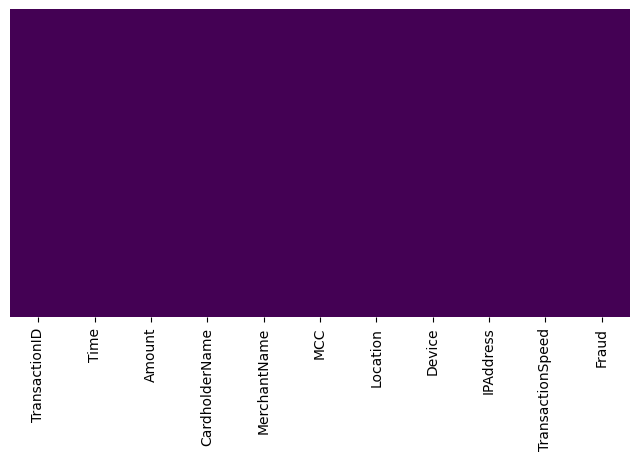

In [21]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [23]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv("credit_card_transactions_limpio.csv", index=False)

## Visualización de los Datos

In [24]:
df = pd.read_csv("credit_card_transactions_limpio.csv")

<ipython-input-26-b3c31e6834d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud', data=df, palette='Set2')


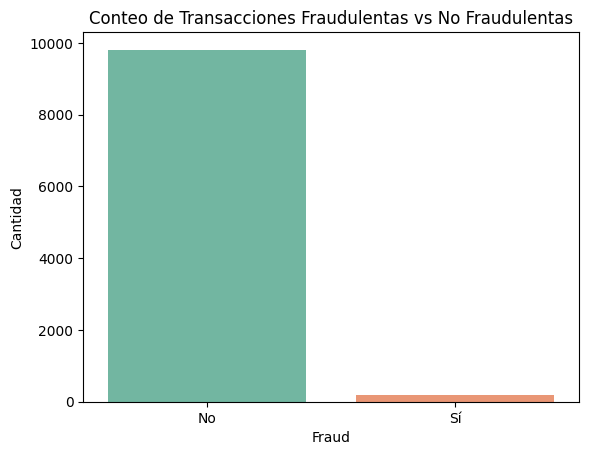

Fraud
0    98.08
1     1.92
Name: proportion, dtype: float64


In [26]:
sns.countplot(x='Fraud', data=df, palette='Set2')
plt.title("Conteo de Transacciones Fraudulentas vs No Fraudulentas")
plt.xticks([0,1], ['No', 'Sí'])
plt.ylabel("Cantidad")
plt.show()

# Porcentaje
porcentaje = df['Fraud'].value_counts(normalize=True) * 100
print(porcentaje)


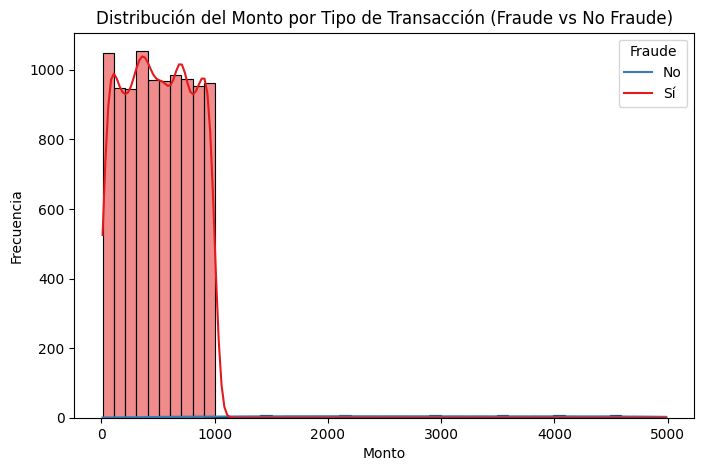

In [28]:
# Distribución del monto
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Amount', hue='Fraud', kde=True, palette='Set1', bins=50)
plt.title("Distribución del Monto por Tipo de Transacción (Fraude vs No Fraude)")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()

<ipython-input-29-ff25f1b1b6f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud', y='Amount', data=df, palette='Set2')


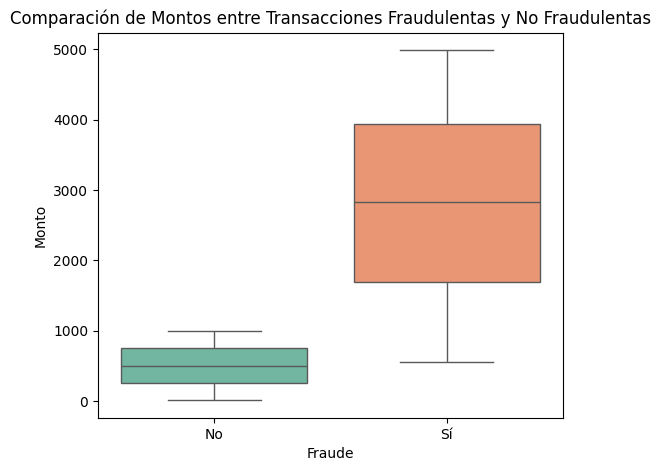

In [29]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Fraud', y='Amount', data=df, palette='Set2')
plt.title("Comparación de Montos entre Transacciones Fraudulentas y No Fraudulentas")
plt.xlabel("Fraude")
plt.ylabel("Monto")
plt.xticks([0,1], ['No', 'Sí'])
plt.show()


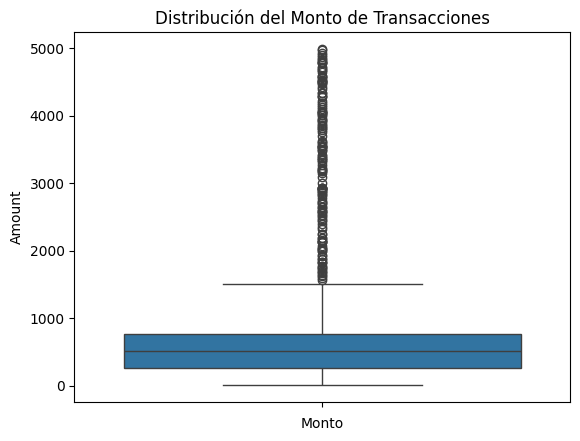

In [34]:
sns.boxplot(y='Amount', data=df)
plt.title("Distribución del Monto de Transacciones")
plt.xlabel("Monto")
plt.show()


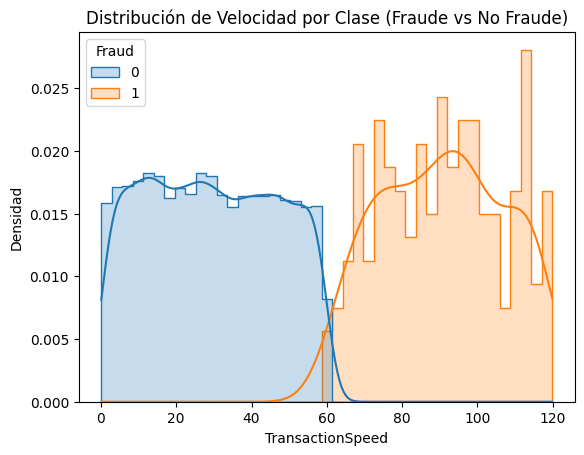

In [35]:
sns.histplot(data=df, x='TransactionSpeed', hue='Fraud', kde=True, element='step', stat='density', common_norm=False)
plt.title("Distribución de Velocidad por Clase (Fraude vs No Fraude)")
plt.xlabel("TransactionSpeed")
plt.ylabel("Densidad")
plt.show()

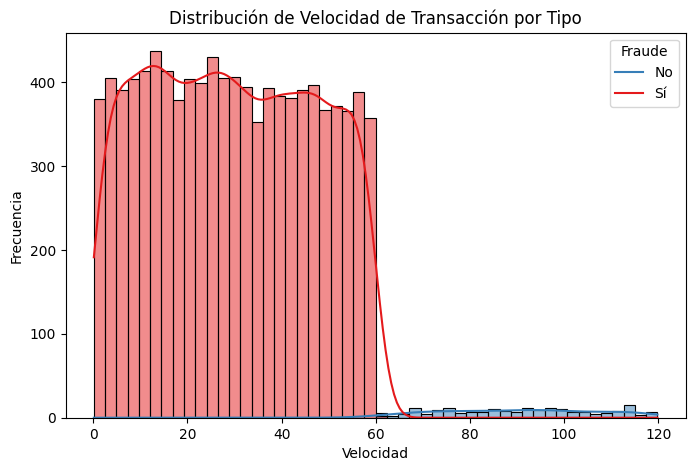

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='TransactionSpeed', hue='Fraud', kde=True, palette='Set1', bins=50)
plt.title("Distribución de Velocidad de Transacción por Tipo")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()


In [37]:
df_temp = df.copy()

In [38]:
df_temp['Time'] = pd.to_datetime(df_temp['Time'])

# Crear el segundo DataFrame con nuevas columnas extraídas
df_extendido = df_temp.copy()
df_extendido['Hour'] = df_temp['Time'].dt.hour
df_extendido['Day'] = df_temp['Time'].dt.day
df_extendido['Month'] = df_temp['Time'].dt.month
df_extendido['Weekday'] = df_temp['Time'].dt.weekday  # 0=Lunes, 6=Domingo

# (Opcional) Mostrar las primeras filas del nuevo DataFrame extendido
print(df_extendido.head())

   TransactionID                Time  Amount     CardholderName  \
0              1 2025-03-09 06:23:57   83.54       Sarah Murray   
1              2 2025-02-14 05:17:36  805.88   Alexander Brooks   
2              3 2024-05-03 15:28:52  450.49       Harold Perez   
3              4 2024-05-03 09:01:14  782.39      Rebecca Davis   
4              5 2025-04-24 17:24:39  713.02  Lauren Benson DDS   

     MerchantName   MCC            Location   Device        IPAddress  \
0  Oconnor-Hughes  5411            Longtown  Android    102.247.49.50   
1        Reed PLC  5261           Woodsland      POS     153.157.50.7   
2       Berry LLC  5261         Jessicatown      iOS  151.174.154.123   
3        Berg Inc  5968  North Krystalburgh  Android    130.70.79.149   
4     King-Gaines  5968   East Danielletown  Android   195.136.16.190   

   TransactionSpeed  Fraud  Hour  Day  Month  Weekday  
0             38.17      0     6    9      3        6  
1             49.84      0     5   14      2  

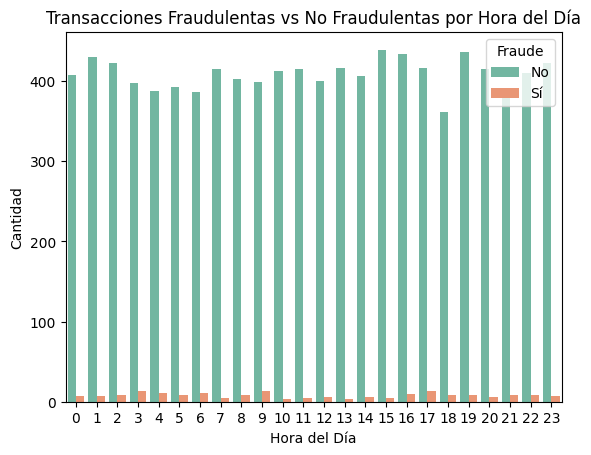

In [39]:
df_extendido['Fraud'] = df_extendido['Fraud'].astype(str)

sns.countplot(x='Hour', hue='Fraud', data=df_extendido, palette='Set2')
plt.title("Transacciones Fraudulentas vs No Fraudulentas por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()


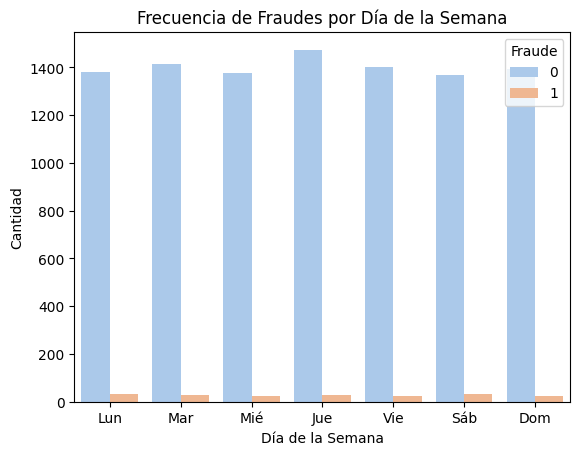

In [40]:
dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
sns.countplot(x='Weekday', hue='Fraud', data=df_extendido, palette='pastel')
plt.title("Frecuencia de Fraudes por Día de la Semana")
plt.xticks(ticks=range(7), labels=dias)
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad")
plt.legend(title="Fraude")
plt.show()


In [41]:
df_feature = df_temp.copy()


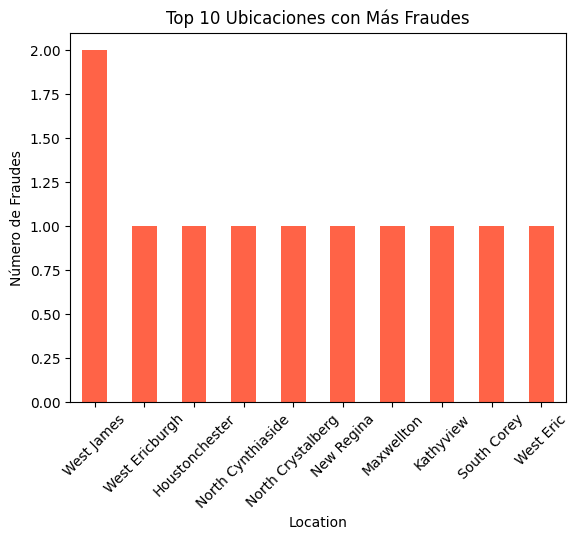

In [42]:
top_locs = df_feature[df_feature['Fraud'] == 1]['Location'].value_counts().head(10)
top_locs.plot(kind='bar', color='tomato')
plt.title("Top 10 Ubicaciones con Más Fraudes")
plt.ylabel("Número de Fraudes")
plt.xticks(rotation=45)
plt.show()
